In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('USGS_Earthquake_Dataset_2000-2025_feature_engineered.csv')
df = df.drop(columns=['day','local_density'])

In [10]:
df.head()

,latitude,longitude,depth,mag,cluster_id,elapsed_years,month_sin,month_cos,cluster_activity
0,-8.160,120.485,200.0,4.7,0,3,-2.449294e-16,1.0,55169
1,47.088,154.231,33.0,4.7,0,3,-2.449294e-16,1.0,55169
2,-29.940,-177.605,33.0,4.7,1,3,-2.449294e-16,1.0,25512
3,46.851,154.066,33.0,4.5,0,3,-2.449294e-16,1.0,55169
4,47.084,154.202,33.0,5.1,0,3,-2.449294e-16,1.0,55169


In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('mag',axis =1)
Y = df['mag']

# We split the data
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
    )



# We will try HyperParameter Tuning to Improve the Scores of our model

In [15]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=300, objective='reg:squarederror', random_state=42, verbosity=0)

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit tuned model
grid_search.fit(X_train, Y_train)
model = grid_search.best_estimator_
print("✅ Best Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
✅ Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.8}


In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# We predict the models results with the test part
y_pred = model.predict(X_test)

#Evaluate the Predictions
print(f'Mean Absolute Error: {mean_absolute_error(Y_test,y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(Y_test,y_pred)}')
print(f'R² Score: {r2_score(Y_test,y_pred)}')

Mean Absolute Error: 0.2668043146835914
Mean Squared Error: 0.14005232434438972
R² Score: 0.0735864570912319


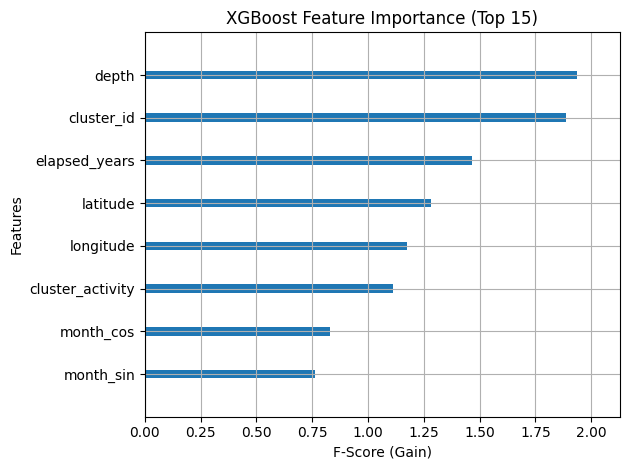

In [17]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(model, importance_type='gain', show_values=False, max_num_features=15)
plt.title("XGBoost Feature Importance (Top 15)")
plt.ylabel("Features")
plt.xlabel("F-Score (Gain)")
plt.tight_layout()
plt.show()